In [283]:
## Importing required packages
import numpy as np
import pandas as pd
import os
import seaborn as sns 
import matplotlib.pyplot as plt 

In [322]:
## Reading in the stop words 
stop_words = pd.read_csv("../Data/stop_words.csv")
stop_words = list(stop_words['word']) ## Converting into list 


In [285]:
## Reading in the text files 
news_names = [] ## Initializing empty list to contain names of the different new agencies 
news_contents = [] ## Initializing empty list to contain content of the articles 

## Reading in the scraped data as strings and storing it in news_contents list 
for root, dirs, files in os.walk("/Users/julian/Desktop/PPOL_Data_Science/coding_discussions_ppol564_fall2021/04_coding_discussion") :
    for file in files:
        if file.endswith('.txt') :
            name = file.split('-')
            news_names.append(name[0]) ## Getting the name of news agency from file name and appending to list 
            with open(os.path.join(root, file)) as f:
                text = f.read()
                news_contents.append(text) ## Reading in the contents as string and appending to list 
                

news_contents[0] ## Displaying text of first article 

'U.S. President Donald Trump and Turkish President Recep Tayyip Erdogan both pronounced themselves unsatisfied with the answers Saudi Arabia has given for the killing of journalist Jamal Khashoggi at the Saudi embassy in Istanbul three weeks ago. Both said the Saudis must be more forthcoming about who ordered the operation that ended with Khashoggi’s death, followed by crude efforts to create an alibi and dispose of his body. Erdogan was forceful in a speech to his AKP party on Tuesday, although he came up short of accusing Saudi King Salman bin Abdulaziz or Crown Prince Mohammed bin Salman of direct involvement with the killing. “It is clear that this savage murder did not happen instantly but was planned,” Erdogan declared, dismissing the Saudi story about Khashoggi accidentally dying in a “fistfight” he started when he visited the Istanbul consulate. “Why was a team of 15 Saudi men, all with qualifications related to the incident, gathering in Istanbul on the day of the murder?” the

In [301]:
news_lists = pd.Series(news_contents) ## Converting list to pandas series to perform vectorized string operations 
## Removing unecessary characters from the strings 
news_lists = news_lists.str.replace('\"', '')
news_lists = news_lists.str.replace('\'', '')
news_lists = news_lists.str.replace('“', '')
news_lists = news_lists.str.replace('”', '')
news_lists = news_lists.str.replace('.', '')
news_lists = news_lists.str.replace('?', '')
news_lists = news_lists.str.replace(',', '')
news_lists = news_lists.str.replace('[', '')
news_lists = news_lists.str.replace(']', '')
news_lists = news_lists.str.replace('(', '')
news_lists = news_lists.str.replace(')', '')
news_lists = news_lists.str.replace('-', '')
## Converting words to lower case 
news_lists = news_lists.str.lower()
## Spliting the string and getting list of words 
news_lists = news_lists.str.split()

In [302]:
def create_data_frame(articles) :
    """
    Function to create data frame of frequency of words from the the news items 
    
    Arguments : 
    ~~~~~~~~~~~
    articles : Series containing the content of the articles
    
    Returns : 
    ~~~~~~~~~~~
    words_df : Required data frame 
    
    """
    words_df = pd.DataFrame() ## Initializing empty data frame 
    
    for article in articles :
        words_freq = {} ## Intializing emptty dictionary 
        for word in article :
            if word in words_freq :
                words_freq[word][0] += 1 ## Creating dictionary with words and their frequency 
            else :
                words_freq[word] = [1]
        words_df = words_df.append(pd.DataFrame(words_freq),ignore_index=True,sort=True) ## Appending dictionary to data frame         
    
    words_df.fillna(0, inplace=True) ## Replacing NAs with 0
    
    return words_df ## Returning the data frame  



In [303]:
df_news_1 = create_data_frame(news_lists) ## Calling the function 
df_news_1

,$50bn,1,11,12,15,15member,18,1:08,2,28,...,world,worse,would,writer,yalova,yelova,yet,your,£385bn,—
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0


In [304]:
def cosine_similarity(df) :
    """
    Function to calculate the cosine of the vectors and return back data frame of cosine similarities
    
    Arguments : 
    ~~~~~~~~~~~
    df : Data frame containing the frequency of words for each article 
    
    Returns :
    ~~~~~~~~~~~
    cos_df : Data frame of cosine similarities between each article 
    
    """    
    cos_df = pd.DataFrame() ## Initializing empty data frame 
    n = df.shape[0] ## Getting the number of articles
    for i in range(n):
        a = df.iloc[i].values  
        a_mag = np.sqrt(np.dot(a,a)) ## Calculating the magnitude
        for j in range(n) :
            b = df.iloc[j].values
            b_mag = np.sqrt(np.dot(b,b)) ## Calculating the magnitude
            cos = np.dot(a,b)/(a_mag*b_mag) ## Calculating the cosine from the dot product 
            l = pd.Series([i+1,j+1,cos])
            cos_df = cos_df.append(l, ignore_index=True) ## Appending to data frame as a row 
         
    col_names = ['Article_A', 'Article_B', 'Cosine_Similarity']        
    cos_df.columns = col_names 
    cos_df = pd.pivot_table(cos_df, index = 'Article_A', columns = 'Article_B', values = 'Cosine_Similarity') ## Creating wide format 
    cos_df.columns = news_names ## Assigning the names of the news agencies 
    cos_df.index = news_names
    return cos_df ## Returning the data frame 

In [307]:
a = cosine_similarity(df_news_1) ## Calling the function to obtain cosine similarities when stop words are not removed 
a

,breitbart,aljazeera,fox,cnn,bbc
breitbart,1.000000,0.836558,0.867174,0.678944,0.896972
aljazeera,0.836558,1.000000,0.841655,0.734659,0.870479
fox,0.867174,0.841655,1.000000,0.736611,0.886703
cnn,0.678944,0.734659,0.736611,1.000000,0.744041
bbc,0.896972,0.870479,0.886703,0.744041,1.000000


Text(47.77777777777777, 0.5, 'News Agencies')

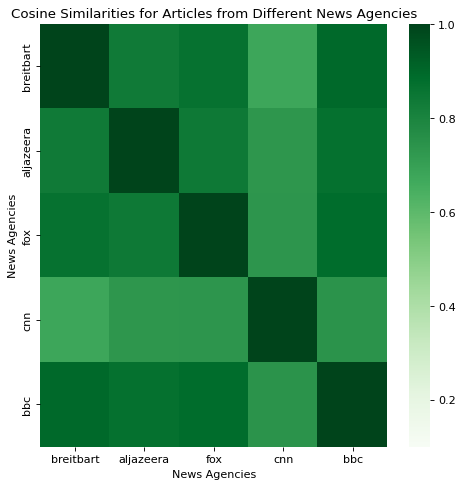

In [320]:
## Plotting the cosine similarities 
plt.figure(figsize = (7,7), dpi =80)
plt.title("Cosine Similarities for Articles from Different News Agencies")
sns.heatmap(a, vmin = 0.1, cmap = 'Greens')
plt.xlabel("News Agencies")
plt.ylabel("News Agencies")

In [309]:
### Removing the stop words from the articles 
for i in range(len(news_names)) :
    news_lists[i] = [word for word in news_lists[i] if word not in stop_words]

## Calling the two functions again to generate cosine similarities 
df_news_2 = create_data_frame(news_lists)    
b = cosine_similarity(df_news_2)
b

,breitbart,aljazeera,fox,cnn,bbc
breitbart,1.000000,0.584001,0.547029,0.367165,0.581631
aljazeera,0.584001,1.000000,0.679743,0.533123,0.678938
fox,0.547029,0.679743,1.000000,0.517322,0.627743
cnn,0.367165,0.533123,0.517322,1.000000,0.503919
bbc,0.581631,0.678938,0.627743,0.503919,1.000000


Text(47.77777777777777, 0.5, 'News Agencies')

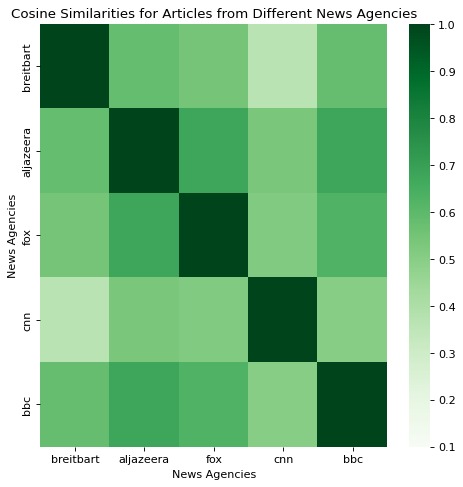

In [319]:
## Plotting the cosine similarities 
plt.figure(figsize = (7,7), dpi =80)
plt.title("Cosine Similarities for Articles from Different News Agencies")
sns.heatmap(b, vmin = 0.1, cmap = 'Greens')
plt.xlabel("News Agencies")
plt.ylabel("News Agencies")

It can be seen from the two tables and graphs above that upon removal of the stop words, the similarities between the articles diminish. Hence the news agencies haven't reported the incident similarly. 
When the **stop words are not removed** then the articles **most similar** are those from BBC and Breitbart and the articles **least similar** are those from Breitbart and CNN.
When **stop words are removed** then the articles **most similar** are those from AlJazeera and BBC and those **least similar** are those from CNN and Breitbart.  

In [315]:
## Removing proper nouns and and calculating cosine similarities
extra_words = ['erdogan', 'trump', 'saudi', 'arabia', 'turkish', 'turkey'] 

for i in range(len(news_names)) :
    news_lists[i] = [word for word in news_lists[i] if word not in extra_words]
    
df_news_3 = create_data_frame(news_lists)   
c = cosine_similarity(df_news_3)
c

,breitbart,aljazeera,fox,cnn,bbc
breitbart,1.000000,0.473376,0.450546,0.237468,0.501545
aljazeera,0.473376,1.000000,0.514544,0.338411,0.521143
fox,0.450546,0.514544,1.000000,0.349501,0.513218
cnn,0.237468,0.338411,0.349501,1.000000,0.377153
bbc,0.501545,0.521143,0.513218,0.377153,1.000000


Text(47.77777777777777, 0.5, 'News Agencies')

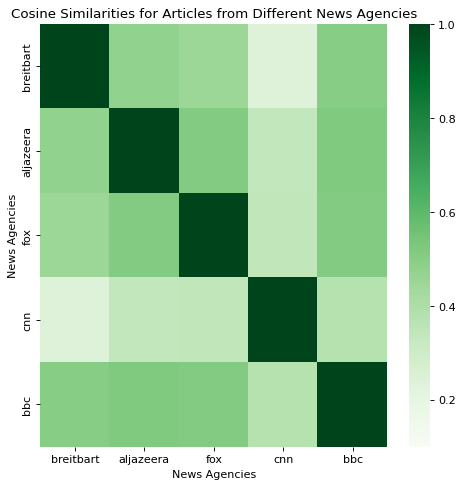

In [318]:
## Plotting the cosine similarities 
plt.figure(figsize = (7,7), dpi =80)
plt.title("Cosine Similarities for Articles from Different News Agencies")
sns.heatmap(c, vmin = 0.1, cmap = 'Greens')
plt.xlabel("News Agencies")
plt.ylabel("News Agencies")

It is observed that upon removing certain proper nouns and recalculating the cosine similarity, the similarities between articles **further reduce**. 